## Neural Network Programming - Deep Learning 

[Playlist link](https://www.youtube.com/watch?v=iTKbyFh-7GM&list=PLZbbT5o_s2xrfNyHZsM6ufI0iZENK9xgG&index=2)

### PyTorch - Python deep learning neural network API


**A tensor is an n-dimensional array.**

With PyTorch tensors, GPU support is built-in. It’s very easy with PyTorch to move tensors to and from a GPU if we have one installed on our system.

![](./img/diag1.png)

Let’s talk about the prospects for learning PyTorch. For beginners to deep learning and neural networks, the top reason for learning PyTorch is that it is a thin framework that stays out of the way.

**PyTorch is thin and stays out of the way!**

When we build neural networks with PyTorch, we are super close to programming neural networks from scratch. The experience of programming in PyTorch is as close as it gets to the real thing.

A common PyTorch characteristic that often pops up is that it’s great for research. The reason for this research suitability has do do with a technical design consideration. To optimize neural networks, we need to calculate derivatives, and to do this computationally, deep learning frameworks use what are called [computational graphs](http://colah.github.io/posts/2015-08-Backprop/).

Computational graphs are used to graph the function operations that occur on tensors inside neural networks.


These graphs are then used to compute the derivatives needed to optimize the neural network. PyTorch uses a computational graph that is called a dynamic computational graph. This means that the graph is generated on the fly as the operations are created.

This is in contrast to static graphs that are fully determined before the actual operations occur.

It just so happens that many of the cutting edge research topics in deep learning are requiring or benefiting greatly from dynamic graphs.



In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [2]:
t = torch.tensor([1,2,3]) # created on CPU by default

# so any operation we do on this tensor will be carried out in the CPU

t

tensor([1, 2, 3])

In [3]:
# move tensor t onto GPU: Returns a copy of this object in CUDA memory.

# t = t.cuda()

# t

### Introducing tensors for deep learning


**A tensor is the primary data structure used by neural networks.**

The relationship within each of these pairs is that both elements require the same number of indexes to refer to a specific element within the data structure.


| Indexes reqd | Computer science | Mathematics
--- | --- | ---
|0 |	number |	scalar |
|1 |	array |	vector |
|2 |	2d-array |	matrix |

For example, suppose we have this array:
Now, suppose we want to access (refer to) the number 3 in this data structure. We can do it using a single index like so:


```
> a = [1,2,3,4]

> a[2]
3

```


This logic works the same for a vector.

As another example, suppose we have this 2d-array:
Now, suppose we want to access (refer to) the number 3 in this data structure. In this case, we need two indexes to locate the specific element.

```
> dd = [
[1,2,3],
[4,5,6],
[7,8,9]
]

> dd[0][2]
3 
```

#### Tensors are generalizations


When more than two indexes are required to access a specific element, we stop giving specific names to the structures, and we begin using more general language.

Indexes required |	Computer science |	Mathematics
--- | --- | ---
n |	nd-array |	nd-tensor

**Tensors and nd-arrays are the same thing!**

So tensors are multidimensional arrays or nd-arrays for short. The reason we say a tensor is a generalization is because we use the word tensor for all values of n like so:

- A scalar is a 0 dimensional tensor
- A vector is a 1 dimensional tensor
- A matrix is a 2 dimensional tensor
- A nd-array is an n dimensional tensor

### Rank, Axes and Shape

The rank, axes, and shape are three tensor attributes that will concern us most when starting out with tensors in deep learning. These concepts build on one another starting with rank, then axes, and building up to shape, so keep any eye out for this relationship between these three.

#### Rank

The rank of a tensor refers to the number of dimensions present within the tensor. Suppose we are told that we have a rank-2 tensor. This means all of the following:

- We have a matrix
- We have a 2d-array
- We have a 2d-tensor


**A tensor's rank tells us how many indexes are needed to refer to a specific element within the tensor.**

#### Axes

An axis of a tensor is a specific dimension of a tensor.


If we say that a tensor is a rank 2 tensor, we mean that the tensor has 2 dimensions, or equivalently, the tensor has two axes.

Elements are said to exist or run along an axis. This running is constrained by the length of each axis. Let's look at the length of an axis now.

The length of each axis tells us how many indexes are available along each axis.

Suppose we have a tensor called t, and we know that the first axis has a length of three while the second axis has a length of four.

Since the first axis has a length of three, this means that we can index three positions along the first axis like so:

```
t[0]
t[1]
t[2]
```

All of these indexes are valid, but we can't move passed index 2.

Since the second axis has a length of four, we can index four positions along the second axis. This is possible for each index of the first axis, so we have

```
t[0][0]
t[1][0]
t[2][0]

t[0][1]
t[1][1]
t[2][1]

t[0][2]
t[1][2]
t[2][2]

t[0][3]
t[1][3]
t[2][3]
```

Let's look at some examples to make this solid. We'll consider the same tensor dd as before:

```

> dd = [
[1,2,3],
[4,5,6],
[7,8,9]
]

# Each element along the first axis, is an array:

> dd[0]
[1, 2, 3]

> dd[1]
[4, 5, 6]

> dd[2]
[7, 8, 9]

# Each element along the second axis, is a number:

> dd[0][0]
1

> dd[1][0]
4

> dd[2][0]
7

```

Note that, with tensors, the elements of the last axis are always numbers. Every other axis will contain n-dimensional arrays. This is what we see in this example, but this idea generalizes.

The rank of a tensor tells us how many axes a tensor has, and the length of these axes leads us to the very important concept known as the shape of a tensor.

#### Shape of a tensor


The shape of a tensor gives us the length of each axis of the tensor.


To work with this tensor's shape, we’ll create a torch.Tensor object like so:




In [4]:
dd = [
[1,2,3],
[4,5,6],
[7,8,9]
]

t = torch.Tensor(dd)

t

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [5]:
type(t)

torch.Tensor

In [6]:
t.shape

torch.Size([3, 3])

This allows us to see the tensor's shape is 3 x 3. Note that, in PyTorch, size and shape of a tensor are the same thing.

The shape of 3 x 3 tells us that each axis of this rank two tensor has a length of 3 which means that we have three indexes available along each axis. Let's look now at why the shape of a tensor is so important.

The shape of a tensor is important for a few reasons. The first reason is because the shape allows us to conceptually think about, or even visualize, a tensor. Higher rank tensors become more abstract, and the shape gives us something concrete to think about.

The shape also encodes all of the relevant information about axes, rank, and therefore indexes.

Additionally, one of the types of operations we must perform frequently when we are programming our neural networks is called reshaping.

As our tensors flow through our networks, certain shapes are expected at different points inside the network, and as neural network programmers, it is our job to understand the incoming shape and have the ability to reshape as needed.

### CNN tensor input shape and feature maps


The shape of a CNN input typically has a length of four. This means that we have a rank-4 tensor with four axes. Each index in the tensor’s shape represents a specific axis, and the value at each index gives us the length of the corresponding axis.

Each axis of a tensor usually represents some type of real world or logical feature of the input data. If we understand each of these features and their axis location within the tensor, then we can have a pretty good understanding of the tensor data structure overall.

To break this down, we’ll work backwards, considering the axes from right to left. Remember, the last axis, which is where we’ll start, is where the actual numbers or data values are located.

If we are running along the last axis and we stop to inspect an element there, we will be looking at a number. If we are running along any other axis, the elements are multidimensional arrays.

For images, the raw data comes in the form of pixels that are represented by a number and are laid out using two dimensions, height and width.

#### Image height and width


The image height and width are represented on the last two axes. Possible values here are 28 x 28, as will be the case for our image data in the fashion-MNIST dataset we’ll be using in our CNN project, or the 224 x 224 image size that is used by VGG16 neural network, or any other image dimensions we can imagine.

#### Image color channels

The next axis represents the color channels. Typical values here are 3 for RGB images or 1 if we are working with grayscale images. This color channel interpretation only applies to the input tensor.

As we will reveal in a moment, the interpretation of this axis changes after the tensor passes through a convolutional layer.

Up to this point using the last three axes, we have represented a complete image as a tensor. We have the color channels and the height and width all laid out in tensor form using three axes.

In terms of accessing data at this point, we need three indexes. We choose a color channel, a height, and a width to arrive at a specific pixel value.

#### Image batches


This brings us to the first axis of the four which represents the batch size. In neural networks, we usually work with batches of samples opposed to single samples, so the length of this axis tells us how many samples are in our batch.

This allows us to see that an entire batch of images is represented using a single rank-4 tensor.

Suppose we have the following shape [3, 1, 28, 28] for a given tensor. Using the shape, we can determine that we have a batch of three images.

**[Batch, Channels, Height, Width]**

Each image has a single color channel, and the image height and width are 28 x 28 respectively.


This gives us a single rank-4 tensor that will ultimately flow through our convolutional neural network.

Given a tensor of images like this, we can navigate to a specific pixel in a specific color channel of a specific image in the batch using four indexes.

#### Output channels and feature maps

Let’s look at how the interpretation of the color channel axis changes after the tensor is transformed by a convolutional layer.

Suppose we have a tensor that contains data from a single 28 x 28 grayscale image. This gives us the following tensor shape: [1, 1, 28, 28].

Now suppose this image is passed to our CNN and passes through the first convolutional layer. When this happens, the shape of our tensor and the underlying data will be changed by the convolution operation.

The convolution changes the height and width dimensions as well as the number of channels. The number of output channels changes based on the number of filters being used in the convolutional layer.

Suppose we have three convolutional filters, and lets just see what happens to the channel axis.

Since we have three convolutional filters, we will have three channel outputs from the convolutional layer. These channels are outputs from the convolutional layer, hence the name output channels opposed to color channels.

Each of the three filters convolves the original single input channel producing three output channels. The output channels are still comprised of pixels, but the pixels have been modified by the convolution operation. Depending on the size of the filter, the height and width dimensions of the output will change also, but we'll leave those details for a future post.

With the output channels, we no longer have color channels, but modified channels that we call feature maps. These so-called feature maps are the outputs of the convolutions that take place using the input color channels and the convolutional filters.

The word “feature” is used because the outputs represent particular features from the image, like edges for example, and these mappings emerge as the network learns during the training process and become more complex as we move deeper into the network.



### Introducing PyTorch Tensors

PyTorch tensors are instances of the torch.Tensor Python class. We can create a torch.Tensor object using the class constructor like so:



In [7]:
t = torch.Tensor()
print (type(t))
print (t.dtype)
print (t.device)
print (t.layout)

<class 'torch.Tensor'>
torch.float32
cpu
torch.strided


The device, cpu in our case, specifies the device (CPU or GPU) where the tensor's data is allocated. This determines where tensor computations for the given tensor will be performed.

PyTorch supports the use of multiple devices, and they are specified using an index like so:

```
> device = torch.device('cuda:0')
> device
device(type='cuda', index=0)
```

If we have a device like above, we can create a tensor on the device by passing the device to the tensor’s constructor. One thing to keep in mind about using multiple devices is that tensor operations between tensors must happen between tensors that exists on the same device.

The layout, strided in our case, specifies how the tensor is stored in memory.

- Tensors contain data of a uniform type (dtype).
- Tensor computations between tensors depend on the dtype and the device


#### Creating tensors using data

These are the primary ways of creating tensor objects (instances of the torch.Tensor class), with data (array-like) in PyTorch:

1. torch.Tensor(data)
2. torch.tensor(data)
3. torch.as_tensor(data)
4. torch.from_numpy(data)

Let’s look at each of these. They all accept some form of data and give us an instance of the torch.Tensor class. Sometimes when there are multiple ways to achieve the same result, things can get confusing, so let’s break this down.

We’ll begin by just creating a tensor with each of the options and see what we get. We’ll start by creating some data.

We can use a Python list, or sequence, but numpy.ndarrays are going to be the more common option, so we’ll go with a numpy.ndarray like so:

In [8]:
data = np.array([1,2,3])

type(data)

numpy.ndarray

In [9]:
o1 = torch.Tensor(data)
o2 = torch.tensor(data)
o3 = torch.as_tensor(data)
o4 = torch.from_numpy(data)

print(o1, o2, o3, o4)

tensor([1., 2., 3.]) tensor([1, 2, 3]) tensor([1, 2, 3]) tensor([1, 2, 3])


All of the options (o1, o2, o3, o4) appear to have produced the same tensors except for the first one. The first option (o1) has dots after the number indicating that the numbers are floats, while the next three options have a type of int32.



In [10]:
data[0] = 1000

In [11]:
print(o1, o2, o3, o4)

tensor([1., 2., 3.]) tensor([1, 2, 3]) tensor([1000,    2,    3]) tensor([1000,    2,    3])


Modification of the numpy array modifies the tensors in case of `as_tensor` and `from_numpy` methods

### Creating PyTorch Tensors - Best Options

Uppercase/lowercase: torch.Tensor() vs torch.tensor()
Notice how the first option torch.Tensor() has an uppercase T while the second option torch.tensor() has a lowercase t. What’s up with this difference?

The first option with the uppercase T is the constructor of the torch.Tensor class, and the second option is what we call a factory function that constructs torch.Tensor objects and returns them to the caller.

You can think of the torch.tensor() function as a factory that builds tensors given some parameter inputs. Factory functions are a software design pattern for creating objects. Okay. That’s the difference between the uppercase T and the lower case t, but which way is better between these two? The answer is that it’s fine to use either one. However, the factory function torch.tensor() has better documentation and more configuration options, so it gets the winning spot at the moment.

Alright, before we knock the torch.Tensor() constructor off our list in terms of use, let’s go over the difference we observed in the printed tensor outputs. The difference is in the dtype of each tensor.

The difference here arises in the fact that the torch.Tensor() constructor uses the default dtype when building the tensor. We can verify the default dtype using the torch.get_default_dtype() method:



In [12]:
torch.get_default_dtype()

torch.float32

The other calls choose a dtype based on the incoming data. This is called type inference. The dtype is inferred based on the incoming data. Note that the dtype can also be explicitly set for these calls by specifying the dtype as an argument:



In [13]:
torch.tensor(data, dtype=torch.float32)

tensor([1000.,    2.,    3.])

In [14]:
torch.as_tensor(data, dtype=torch.float32)

tensor([1000.,    2.,    3.])

With torch.Tensor(), we are unable to pass a dtype to the constructor. This is an example of the torch.Tensor() constructor lacking in configuration options. This is one of the reasons to go with the torch.tensor() factory function for creating our tensors.

#### Sharing memory for performance: copy vs share

torch.Tensor() and torch.tensor() copy their input data while torch.as_tensor() and torch.from_numpy() share their input data in memory with the original input object.

This sharing just means that the actual data in memory exists in a single place. As a result, any changes that occur in the underlying data will be reflected in both objects, the torch.Tensor and the numpy.ndarray.

Sharing data is more efficient and uses less memory than copying data because the data is not written to two locations in memory.

This establishes that torch.as_tensor() and torch.from_numpy() both share memory with their input data. However, which one should we use, and how are they different?

The torch.from_numpy() function only accepts numpy.ndarrays, while the torch.as_tensor() function accepts a wide variety of Python array-like objects including other PyTorch tensors. For this reason, torch.as_tensor() is the winning choice in the memory sharing game.

#### Best options for creating tensors in PyTorch

Given all of these details, these two are the best options:

- torch.tensor()
- torch.as_tensor()

The torch.tensor() call is the sort of go-to call, while torch.as_tensor() should be employed when tuning our code for performance.

Some things to keep in mind (memory sharing works where it can):


- Since numpy.ndarray objects are allocated on the CPU, the as_tensor() function must copy the data from the CPU to the GPU when a GPU is being used.
- The memory sharing of as_tensor() doesn’t work with built-in Python data structures like lists.
- The as_tensor() call requires developer knowledge of the sharing feature. This is necessary so we don’t inadvertently make an unwanted change in the underlying data without realizing the change impacts multiple objects.
- The as_tensor() performance improvement will be greater when there are a lot of back and forth operations between numpy.ndarray objects and tensor objects. However, if there is just a single load operation, there shouldn’t be much impact from a performance perspective.

### Reshaping operations

We have the following high-level categories of operations:

- Reshaping operations
- Element-wise operations
- Reduction operations
- Access operations

#### Reshaping operations for tensors

Reshaping operations are perhaps the most important type of tensor operations. This is because, like we mentioned in the post where we introduced tensors, the shape of a tensor gives us something concrete we can use to shape an intuition for our tensors.



In [15]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

print (t.size())
print (t.shape)
print ("Rank:", len(t.shape))
print ("Num elems:", torch.tensor(t.shape).prod())
print ("Num elems:", t.numel())

torch.Size([3, 4])
torch.Size([3, 4])
Rank: 2
Num elems: tensor(12)
Num elems: 12


The number of elements contained within a tensor is important for reshaping because the reshaping must account for the total number of elements present. Reshaping changes the tensor's shape but not the underlying data. Our tensor has 12 elements, so any reshaping must account for exactly 12 elements.

Let’s look now at all the ways in which this tensor t can be reshaped without changing the rank:



In [16]:
t.reshape([1,12])
t.reshape([2,6])
t.reshape([4,3])
t.reshape(12,1)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.]])

 The underlying logic is the same for higher dimensional tenors even though we may not be able to use the intuition of rows and columns in higher dimensional spaces. For example:

In [17]:
t.reshape([2,2,3])

tensor([[[1., 1., 1.],
         [1., 2., 2.]],

        [[2., 2., 3.],
         [3., 3., 3.]]])

In this example, we increase the rank to 3, and so we lose the rows and columns concept. However, the product of the shape's components (2,2,3) still has to be equal to the number of elements in the original tensor ( 12).

Note that PyTorch has another function that you may see called view() that does the same thing as the reshape() function, but don't let these names through you off. No matter which deep learning framework we are using, these concepts will be the same.

#### Changing shape by squeezing and unsqueezing

The next way we can change the shape of our tensors is by squeezing and unsqueezing them.

- Squeezing a tensor removes the dimensions or axes that have a length of one.
- Unsqueezing a tensor adds a dimension with a length of one.

These functions allow us to expand or shrink the rank (number of dimensions) of our tensor. Let’s see this in action.

In [18]:
print(t.reshape([1,12]))
print(t.reshape([1,12]).shape)
print(t.reshape([1,12]).squeeze())
print(t.reshape([1,12]).squeeze().shape)

print(t.reshape([1,12]).squeeze().unsqueeze(dim=0))
print(t.reshape([1,12]).squeeze().unsqueeze(dim=0).shape)
print(t.reshape([1,12]).squeeze().unsqueeze(dim=1))
print(t.reshape([1,12]).squeeze().unsqueeze(dim=1).shape)

# t remains unchanged in all of these ops

print (t)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])
tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])
tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.]])
torch.Size([12, 1])
tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])


#### Flatten a tensor

A flatten operation on a tensor reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor. This is the same thing as a 1d-array of elements.

Flattening a tensor means to remove all of the dimensions except for one.



In [19]:
t.reshape(-1)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [20]:
def flatten(t):
    t = t.reshape(1, -1)
    t = t.squeeze()
    return t

The flatten() function takes in a tensor t as an argument.

Since the argument t can be any tensor, we pass -1 as the second argument to the reshape() function. In PyTorch, the -1 tells the reshape() function to figure out what the value should be based on the number of elements contained within the tensor. Remember, the shape must equal the product of the shape's component values. This is how PyTorch can figure out what the value should be, given a 1 as the first argument.

Since our tensor t has 12 elements, the reshape() function is able to figure out that a 12 is required for the length of the second axis.

After squeezing, the first axis (axis-0) is removed, and we obtain our desired result, a 1d-array of length 12.

Here's an example of this in action:

In [21]:
t = torch.ones(4, 3)
print (t)

flatten(t)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In a future post when we begin building a convolutional neural network, we will see the use of this flatten() function. We'll see that flatten operations are required when passing an output tensor from a convolutional layer to a linear layer.

In these examples, we have flattened the entire tensor, however, it is possible to flatten only specific parts of a tensor. For example, suppose we have a tensor of shape [2,1,28,28] for a CNN. This means that we have a batch of 2 grayscale images with height and width dimensions of 28 x 28, respectively.

Here, we can specifically flatten the two images. To get the following shape: [2,1,784]. We could also squeeze off the channel axes to get the following shape: [2,784].

#### Concatenating tensors

We combine tensors using the cat() function, and the resulting tensor will have a shape that depends on the shape of the two input tensors.



In [22]:
t1 = torch.tensor([
    [1,2],
    [3,4]
])
t2 = torch.tensor([
    [5,6],
    [7,8]
])

# We can combine t1 and t2 row-wise (axis-0) in the following way:

print (torch.cat((t1,t2), dim=0))

print (torch.cat((t1,t2), dim=1))

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])


### Flatten operation for a batch of image inputs to a CNN

A tensor flatten operation is a common operation inside convolutional neural networks. This is because convolutional layer outputs that are passed to fully connected layers must be flatted out before the fully connected layer will accept the input.

In past posts, we learned about a tensor’s shape and then about reshaping operations. A flatten operation is a specific type of reshaping operation where by all of the axes are smooshed or squashed together.

To flatten a tensor, we need to have at least two axes. This makes it so that we are starting with something that is not already flat. Let’s look now at a hand written image of an eight from the MNIST dataset. This image has 2 distinct dimensions, height and width.

![](http://deeplizard.com/images/CNN%20Flatten%20Operation%20Visualized.png)

The height and width are 18 x 18 respectively. These dimensions tell us that this is a cropped image because the MNIST dataset contains 28 x 28 images. Let’s see now how these two axes of height and width are flattened out into a single axis of length 324.

The image above shows our flattened output with a single axis of length 324. The white on the edges corresponds to the white at the top and bottom of the image. The flatten operation can be thought of as taking rows of pixels from the img one by one nad stacking them up horizontally. 

In this example, we are flattening the entire tensor image, but what if we want to only flatten specific axes within the tensor? This is typically required when working with CNNs.

Let’s see how we can flatten out specific axes of a tensor in code with PyTorch.

#### Flattening specific axes of a tensor


In the post on CNN input tensor shape, we learned how tensor inputs to a convolutional neural network typically have 4 axes, one for batch size, one for color channels, and one each for height and width.



In [23]:
# Building a tensor representation for a batch of images

t1 = torch.tensor([
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]
])

t2 = torch.tensor([
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2]
])

t3 = torch.tensor([
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3]
])

Each of these has a shape of 4 x 4, so we have three rank-2 tensors. For our purposes here, we’ll consider these to be three 4 x 4 images that well use to create a batch that can be passed to a CNN.

Remember, batches are represented using a single tensor, so we’ll need to combine these three tensors into a single larger tensor that has three axes instead of 2.

In [24]:
t = torch.stack((t1,t2,t3))
t.shape

torch.Size([3, 4, 4])

Here, we used the stack() function to concatenate our sequence of three tensors along a new axis. Since we have three tensors along a new axis, we know the length of this axis should be 3, and indeed, we can see in the shape that we have 3 tensors that have height and width of 4.

The axis with a length of 3 represents the batch size while the axes of length for represent the height and width respectively.

At this point, we have a rank-3 tensor that contains a batch of three 4 x 4 images. All we need to do now to get this tensor into a form that a CNN expects is add an axis for the color channels. We basically have an implicit single color channel for each of these image tensors, so in practice, these would be grayscale images.

A CNN will expect to see an explicit color channel axis, so let’s add one by reshaping this tensor.

In [25]:
t = t.reshape(3,1,4,4)
print (t)

print (t.shape)

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])
torch.Size([3, 1, 4, 4])


Notice how we have specified an axis of length 1 right after the batch size axis. Then, we follow with the height and width axes length 4. Also, notice how the additional axis of length 1 doesn’t change the number of elements in the tensor. This is because the product of the components values doesn't change when we multiply by one.

The first axis has 3 elements. Each element of the first axis represents an image. For each image, we have a single color channel on the channel axis. Each of these channels contain 4 arrays that contain 4 numbers or scalar components.

In [26]:
# first image
print (t[0])

# first (and only) color channel of first image

print (t[0][0])

# first row of pixels in first col channel of first image

print (t[0][0][0])

# first pixel value in the first row of the first color channel of the first image.

print (t[0][0][0][0])


tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])
tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])
tensor([1, 1, 1, 1])
tensor(1)


Alright. Let’s see how to flatten the images in this batch. Remember the whole batch is a single tensor that will be passed to the CNN, so we don’t want to flatten the whole thing. We only want to flatten the image tensors within the batch tensor.

Let’s flatten the whole thing first just to see what it will look like. Plus I want to do a shout out to everyone who provided alternative implementations of the flatten() function we created in the last post. Take a look.

In [27]:
print (t.reshape(1,-1)[0])

print (t.reshape(-1))

print (t.flatten())

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


At the bottom, you’ll notice another way that comes built-in as method for tensor objects called, you guessed it, flatten(). This method produces the very same output as the other alternatives.

What I want you to notice about this output is that we have flattened the entire batch, and this smashes all the images together into a single axis. Remember the ones represent the pixels from the first image, the twos the second image, and the threes from the third.

This flattened batch won’t work well inside our CNN because we need individual predictions for each image within our batch tensor, and now we have a flattened mess.

The solution here, is to flatten each image while still maintaining the batch axis. This means we want to flatten only part of the tensor. We want to flatten the, color channel axis with the height and width axes.

```
These axes need to be flattened: (C,H,W)
```

This can be done with PyTorch’s built-in flatten() method.

In [28]:
print (t.flatten(start_dim=1))

print (t.flatten(start_dim=1).shape)


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])
torch.Size([3, 16])


Notice in the call how we specified the start_dim parameter. This tells the flatten() method which axis it should start the flatten operation. The one here is an index, so it’s the second axis which is the color channel axis. We skip over the batch axis so to speak, leaving it intact.

Checking the shape, we can see that we have a rank-2 tensor with three single color channel images that have been flattened out into 16 pixels.

### Broadcasting and Element-wise Operations

An element-wise operation is an operation between two tensors that operates on corresponding elements within the respective tensors.

Two elements are said to be corresponding if the two elements occupy the same position within the tensor. The position is determined by the indexes used to locate each element.

Suppose we have the following two tensors:



In [29]:
t1 = torch.tensor([
    [1,2],
    [3,4]
], dtype=torch.float32)

t2 = torch.tensor([
    [9,8],
    [7,6]
], dtype=torch.float32)

# Example of the first axis
print(t1[0])


# Example of the second axis
print(t1[0][0])


tensor([1., 2.])
tensor(1.)


We know that two elements are said to be corresponding if the two elements occupy the same position within the tensor, and the position is determined by the indexes used to locate each element. Two tensors must have the same shape in order to perform element-wise operations on them.

In [30]:
# Addition is an element-wise operation

t1+t2

tensor([[10., 10.],
        [10., 10.]])

This allow us to see that addition between tensors is an element-wise operation. Each pair of elements in corresponding locations are added together to produce a new tensor of the same shape.

So, addition is an element-wise operation, and in fact, all the arithmetic operations, add, subtract, multiply, and divide are element-wise operations.

#### Arithmetic operations are element-wise operations

An operation we commonly see with tensors are arithmetic operations using scalar values. There are two ways we can do this:

(1) Using these symbolic operations:



```

> print(t + 2)
tensor([[3., 4.],
        [5., 6.]])

> print(t - 2)
tensor([[-1.,  0.],
        [ 1.,  2.]])

> print(t * 2)
tensor([[2., 4.],
        [6., 8.]])

> print(t / 2)
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
        
```
or equivalently, (2) these built-in tensor object methods:

```
> print(t1.add(2))
tensor([[3., 4.],
        [5., 6.]])

> print(t1.sub(2))
tensor([[-1.,  0.],
        [ 1.,  2.]])

> print(t1.mul(2))
tensor([[2., 4.],
        [6., 8.]])

> print(t1.div(2))
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
```

Both of these options work the same. We can see that in both cases, the scalar value, 2, is applied to each element with the corresponding arithmetic operation.

Something seems to be wrong here. These examples are breaking the rule we established that said element-wise operations operate on tensors of the same shape.

Scalar values are Rank-0 tensors, which means they have no shape, and our tensor t1 is a rank-2 tensor of shape 2 x 2.

So how does this fit in? Let’s break it down.

The first solution that may come to mind is that the operation is simply using the single scalar value and operating on each element within the tensor.

This logic kind of works. However, it’s a bit misleading, and it breaks down in more general situations where we’re note using a scalar.

To think about these operations differently, we need to introduce the concept of tensor broadcasting or broadcasting.

#### Broadcasting tensors

Broadcasting is the concept whose implementation allows us to add scalars to higher dimensional tensors.


Let's think about the t1 + 2 operation. Here, the scaler valued tensor is being broadcasted to the shape of t1, and then, the element-wise operation is carried out.

We can see what the broadcasted scalar value looks like using the broadcast_to() Numpy function:

In [31]:
np.broadcast_to(2, shape=t1.shape)

array([[2, 2],
       [2, 2]])

This means the scalar value is transformed into a rank-2 tensor just like t1, and just like that, the shapes match and the element-wise rule of having the same shape is back in play. This is all under the hood of course.



In [32]:
print (t1 + 2)

# is essentially this:

print (t1 + torch.tensor(np.broadcast_to(2, t1.shape), dtype=torch.float32))

tensor([[3., 4.],
        [5., 6.]])
tensor([[3., 4.],
        [5., 6.]])


Let's look at a trickier example to hit this point home. Suppose we have the following tensor.



In [33]:
t1 = torch.tensor([
    [1,1],
    [1,1]
], dtype=torch.float32)

t2 = torch.tensor([2,4], dtype=torch.float32)

In [34]:
print (np.broadcast_to(t2.numpy(), t1.shape))

print (t1 + t2)

[[2. 4.]
 [2. 4.]]
tensor([[3., 5.],
        [3., 5.]])


After broadcasting, the addition operation between these two tensors is a regular element-wise operation between tensors of the same shape.

Understanding element-wise operations and the same shape requirement provide a basis for the concept of broadcasting and why it is used.

When do we actually use broadcasting? We often need to use broadcasting when we are preprocessing our data, and especially during normalization routines.

#### Comparison operations are element-wise

Comparison operations are also element-wise. For a given comparison operations between tensors, a new tensor of the same shape is returned with each element containing either a 0 or a 1.

- 0 if the comparison between corresponding elements is False.
- 1 if the comparison between corresponding elements is True.

```

> t = torch.tensor([
    [0,5,0],
    [6,0,7],
    [0,8,0]
], dtype=torch.float32)

> t.eq(0)
tensor([[1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]], dtype=torch.uint8)


> t.ge(0)
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)


> t.gt(0)
tensor([[0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]], dtype=torch.uint8)


> t.lt(0)
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)

> t.le(7)
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 0, 1]], dtype=torch.uint8)
        
```
Thinking about these operations from a broadcasting perspective, we can see that the last one, t.le(7), is really this:

```
> t <= torch.tensor(
    np.broadcast_to(7, t.shape)
    ,dtype=torch.float32
)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 0, 1]], dtype=torch.uint8)
        
```

#### Element-wise operations using functions

With element-wise operations that are functions, it’s fine to assume that the function is applied to each element of the tensor.

Here are some examples:

```
> t.abs() 
tensor([[0., 5., 0.],
        [6., 0., 7.],
        [0., 8., 0.]])


> t.sqrt()
tensor([[0.0000, 2.2361, 0.0000],
        [2.4495, 0.0000, 2.6458],
        [0.0000, 2.8284, 0.0000]])

> t.neg()
tensor([[-0., -5., -0.],
        [-6., -0., -7.],
        [-0., -8., -0.]])

> t.neg().abs()
tensor([[0., 5., 0.],
        [6., 0., 7.],
        [0., 8., 0.]])
        
```



In [35]:
np.broadcast_to([[4],[5],[6]], shape=(3,3))

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

[Detailed broadcasting post](http://deeplizard.com/learn/video/6_33ulFDuCg)

#### Broadcasting Example 1: Same shapes

For example, it might be relatively easy to look at these two rank-2 tensors and figure out what the sum of them would be.



In [36]:
t1 = torch.tensor([[1,2,3]])
t1.shape
t2 = torch.tensor([[4,5,6]])
print (t1+t2)

tensor([[5, 7, 9]])


Now, since these two tensors have the same shape, (1, 3), no broadcasting is happening here. Remember, broadcasting comes into play when we have tensors with different shapes.

#### Example 2: Same rank, different shapes


In [37]:
t1 = torch.tensor([[1,2,3]])
t2 = torch.tensor([[4],
                   [5],
                   [6]])
print (t1.shape, t2.shape)

print (t1+t2)

print ((t1+t2).shape)

torch.Size([1, 3]) torch.Size([3, 1])
tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])
torch.Size([3, 3])


We have two tensors with different shapes. The goal of broadcasting is to make the tensors have the same shape so we can perform element-wise operations on them.

First, we have to see if the operation we’re trying to do is even possible between the given tensors. Based on the tensors’ original shapes, there may not be a way to reshape them to force them to be compatible, and if we can’t do that, then we can’t use broadcasting.

#### Step 1: Determine if tensors are compatible

The rule to see if broadcasting can be used is this.

We compare the shapes of the two tensors, starting at their last dimensions and working backwards. Our goal is to determine whether each dimension between the two tensors’ shapes is compatible.

The dimensions are compatible when either:

- They’re equal to each other.
- One of them is 1.

In our example, we have shapes (3, 1) and (1, 3). So we first compare the last dimensions.

Comparing the last dimensions of the two shapes, we have a 1 and a 3. Are these compatible? Well, let’s check the rule.

Are they equal to each other? No, 1 doesn’t equal 3.

Is one of them 1? Yes.

Great, the last dimensions are compatible. Working our way to the front, for the next dimension, we have a 3 and a 1. Similar story, just switched order, right? So, are these compatible? Yes, again, because one of them is 1.

Ok, that’s the first step. We’ve confirmed each dimension between the two shapes is compatible.

If, however, while comparing the dimensions, we confirmed that at least one dimension wasn’t compatible, then we would cease our efforts there because the arithmetic operation would not be possible between the two.

Now, since we’ve confirmed that our two tensors are compatible, we can sum them and use broadcasting to do it.

#### Step 2: Determine the shape of the resulting tensor

When we sum two tensors, the result of this sum will be a new tensor. Our next step is to find out the shape of this resulting tensor. We do that by, again, comparing the shapes of the original tensors.

Let’s see exactly how this is done.

Comparing the shape of (1, 3) to (3, 1), we first calculate the max of the last dimension.

The max of 3 and 1 is 3. 3 will be the last dimension of the shape of the resulting tensor.

Moving on to the next dimension, again, the max of 1 and 3 is 3. So, 3 will be the next dimension of the shape of the resulting tensor.

We’ve now stepped through each dimension of the shapes of the original tensors. We can conclude that the resulting tensor will have shape (3, 3).

The original tensors of shape (1, 3) and (3, 1) will now be expanded to shape (3, 3) in order to do the element-wise operation.

Broadcasting can be thought of as copying the existing values within the original tensor and expanding that tensor with these copies until it reaches the required shape.

The values in our (1, 3) tensor will now be broadcast to this (3, 3) tensor.

Tensor 1 and Tensor 2 broadcast to shape (3,3):



In [38]:
print (np.broadcast_to(t1.numpy(), (3,3)))
print (np.broadcast_to(t2.numpy(), (3,3)))

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]]


We can now easily take the element-wise sum of these two to get this resulting (3, 3) tensor.

```
    [[1, 2, 3],
     [1, 2, 3],
     [1, 2, 3]]
+
    [[4, 4, 4],
     [5, 5, 5],
     [6, 6, 6]]
-------------------- 
    [[5, 6, 7],
     [6, 7, 8],
     [7, 8, 9]] 
```

#### Broadcasting Example 3: Different ranks

What if we wanted to multiply this rank-2 tensor of shape (1, 3) with this rank-0 tensor, better known as a scalar?

We first compare the last dimensions of the two shapes.

When we’re in a situation where the ranks of the two tensors aren’t the same, like what we have here, then we simply substitute a one in for the missing dimensions of the lower-ranked tensor.

In our example, we substitute a one for both missing dimensions in the scalar's shape, making it now have shape (1,1)

Then, we ask, are the dimensions compatible? And the answer will always be yes in this type of scenario since one of them will always be a one.

Alright, all the dimensions are compatible, so what will the resulting tensor look like from multiplying these two together? Again, go ahead and pause here and try yourself before getting the answer.

Well, the max of 3 and 1 is 3, and the max of 1 and 1 is 1. So our resulting tensor will be of shape (1, 3).

Our first tensor is already this shape, so it gets left alone. Our second tensor is now expanded to this shape by broadcasting it’s value like this.

```
Before:
    5

After:
    [[5, 5, 5],]
    
```

Now, we can do our element-wise multiplication to get this resulting (1, 3) tensor.

```
  [[1, 2, 3],]
x 
    5
-------------------- 
    [[5, 10, 15],]
    rank: 2
    shape: (1,3)
```

#### Broadcasting Example 4: Different ranks… again

```

[[[1, 2, 3],
  [4, 5, 6]]]

rank: 3
shape: (1,2,3)

[[1, 1, 1],
 [2, 2, 2],
 [3, 3, 3]]

rank: 2
shape: (3,3)

```

Comparing the second-to-last dimensions of the shapes, they’re not equal to each other, and neither one of them is one, so we stop there.



#### Tensor Reduction Ops for Deep Learning

A reduction operation on a tensor is an operation that reduces the number of elements contained within the tensor.

```
> t = torch.tensor([
    [0,1,0],
    [2,0,2],
    [0,3,0]
], dtype=torch.float32)

> t.sum()
tensor(8.)

```

The sum of our tensor's scalar components is calculated using the sum() tensor method. The result of this call is a scalar valued tensor.

Checking the number of elements in the original tensor against the result of the sum() call, we can see that, indeed, the tensor returned by the call to sum() contains fewer elements than the original.

Since the number of elements have been reduced by the operation, we can conclude that the sum() method is a reduction operation.

#### Reducing tensors by axes

To reduce a tensor with respect to a specific axis, we use the same methods, and we just pass a value for the dimension parameter. Let’s see this in action.

Suppose we have the following tensor:

In [39]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)


This is a 3 x 4 rank-2 tensor. Having different lengths for the two axes will help us understand these reduce operations.

Let’s consider the sum() method again. Only, this time, we will specify a dimension to reduce. We have two axes so we'll do both. Check it out.



In [40]:
print (t.sum(dim=0))

print (t.sum(dim=1))

tensor([6., 6., 6., 6.])
tensor([ 4.,  8., 12.])


Let’s go over what happened here.

We’ll tackle the first axis first. When take the summation of the first axis, we are summing the elements of the first axis.



In [41]:
t[0] + t[1] + t[2]

tensor([6., 6., 6., 6.])

When we sum across the first axis, we are taking the summation of all the elements of the first axis.

The second axis in this tensor contains numbers that come in groups of four. Since we have three groups of four numbers, we get three sums.



In [42]:
print (t[0].sum(), t[1].sum(), t[2].sum())

tensor(4.) tensor(8.) tensor(12.)


Now, with this heavy lifting out of the way. Let’s look now a very common reduction operation used in neural network programming called Argmax.

#### Argmax tensor reduction operation

Argmax is a mathematical function that tells us which argument, when supplied to a function as input, results in the function’s max output value.

When we call the argmax() method on a tensor, the tensor is reduced to a new tensor that contains an index value indicating where the max value is inside the tensor. Let’s see this in code.



In [43]:
t = torch.tensor([
    [1,0,0,2],
    [0,3,3,0],
    [4,0,0,5]
], dtype=torch.float32)

In this tensor, we can see that the max value is the 5 in the last position of the last array.

Suppose we are tensor walkers. To arrive at this element, we walk down the first axis until we reach the last array element, and then we walk down to the end of this array passing by the 4, and the two 0s.

In [44]:
print(t.max())

print (t.argmax())

print (t.flatten()[11])

tensor(5.)
tensor(11)
tensor(5.)


The first piece of code confirms for us that the max is indeed 5, but the call to the argmax() method tells us that the 5 is sitting at index 11. What’s happening here?

We’ll have a look at the flattened output for this tensor. If we don’t specific an axis to the argmax() method, it returns the index location of the max value from the flattened tensor, which in this case is indeed 11.

Let's see how we can work with specific axes now.



In [45]:
print (t.max(dim=0))

print (t.argmax(dim=0))

print (t.max(dim=1))

print (t.argmax(dim=1))

(tensor([4., 3., 3., 5.]), tensor([2, 1, 1, 2]))
tensor([2, 1, 1, 2])
(tensor([2., 3., 5.]), tensor([3, 2, 3]))
tensor([3, 2, 3])


We’re working with both axes of this tensor in this code. Notice how the call to the max() method returns two tensors. The first tensor contains the max values and the second tensor contains the index locations for the max values. This is what argmax gives us.

For the first axis, the max values are, 4, 3, 3, and 5. These values are determined by taking the element-wise maximum across each array running across the first axis.

For each of these maximum values, the argmax() method tells us which element along the first axis where the value lives.

- The 4 lives at index two of the first axis.
- The first 3 lives at index one of the first axis.
- The second 3 lives at index one of the first axis.
- The 5 lives at index two of the first axis.

In [46]:
print(t[2][0],t[1][1], t[1][2], t[2][3])

tensor(4.) tensor(3.) tensor(3.) tensor(5.)


For the second axis, the max values are 2, 3, and 5. These values are determined by taking the maximum inside each array of the first axis. We have three groups of four, which gives us 3 maximum values.

The argmax values here, tell the index inside each respective array where the max value lives.

In practice, we often use the argmax() function on a network’s output prediction tensor, to determine which category has the highest prediction value.

#### Accessing elements inside tensors


The last type of common operation that we need for tensors is the ability to access data from within the tensor. Let’s look at these for PyTorch.

Suppose we have the following tensor:

```
> t = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
], dtype=torch.float32)

> t.mean()
tensor(5.)

> t.mean().item()
5.0
```
Check out these operations on this one. When we call mean on this 3 x 3 tensor, the reduced output is a scalar valued tensor. If we want to actually get the value as a number, we use the item() tensor method. This works for scalar valued tensors.

Have a look at how we do it with multiple values:

```
> t.mean(dim=0).tolist()
[4.0, 5.0, 6.0]

> t.mean(dim=0).numpy()
array([4., 5., 6.], dtype=float32)
```

When we compute the mean across the first axis, multiple values are returned, and we can access the numeric values by transforming the output tensor into a Python list or a NumPy array.



### Extract, Transform, and Load (ETL) with PyTorch

There are four general steps that we’ll be following as we move through this project:

- Prepare the data
- Build the model
- Train the model
- Analyze the model’s results

In this post, we’ll kick things off by preparing the data. To prepare our data, we'll be following what is loosely known as an ETL process.

- Extract data from a data source.
- Transform data into a desirable format.
- Load data into a suitable structure.


The ETL process can be thought of as a fractal process because it can be applied on various scales. The process can be applied on a small scale, like a single program, or on a large scale, all the way up to the enterprise level where there are huge systems handling each of the individual parts.

We begin by importing all of the necessary PyTorch libraries

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

This table describes the of each of these packages:

Package |	Description
--- | ---
torch |	The top-level PyTorch package and tensor library.
torch.nn |	A subpackage that contains modules and extensible classes for building neural networks.
torch.optim |	A subpackage that contains standard optimization operations like SGD and Adam.
torch.nn.functional |	A functional interface that contains typical operations used for building neural networks like loss functions and convolutions.
torchvision |	A package that provides access to popular datasets, model architectures, and image transformations for computer vision.
torchvision.transforms |	An interface that contains common transforms for image processing.

Other imports
The next imports are standard packages used for data science in Python:

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)

Note that pdb is the Python debugger and the commented import is a local file that we’ll introduce in future posts for plotting the confusion matrix, and the last line sets the print options for PyTorch print statements.

We are ready now to prepare our data.

#### Preparing our data using PyTorch

Our ultimate goal when preparing our data is to do the following (ETL):

- Extract – Get the Fashion-MNIST image data from the source.
- Transform – Put our data into tensor form.
- Load – Put our data into an object to make it easily accessible

For these purposes, PyTorch provides us with two classes:

- torch.utils.data.Dataset:	An abstract class for representing a dataset.
- torch.utils.data.DataLoader:	Wraps a dataset and provides access to the underlying data.

An abstract class is a Python class that has methods we must implement, so we can create a custom dataset by creating a subclass that extends the functionality of the Dataset class.

To create a custom dataset using PyTorch, we extend the Dataset class by creating a subclass that implements these required methods. Upon doing this, our new subclass can then be passed to the a PyTorch DataLoader object.

We will be using the fashion-MNIST dataset that comes built-in with the torchvision package, so we won’t have to do this for our project. Just know that the Fashion-MNIST built-in dataset class is doing this behind the scenes.

Specifically, there are two methods that are required to be implemented. The __len__ method which returns the length of the dataset, and the __getitem__ method that gets an element from the dataset at a specific index location within the dataset.



#### Challenge in video:

Use pytorch torchvision source code to figure out:

1. Which class does MNIST extend - torch.utils.data.Dataset
2. Where the MNIST class fetches its data from (find domain names) - http://yann.lecun.com/
3. Try to see the the significance of the name in the domain name as it pertains to CNNs - http://yann.lecun.com/ : He is the founding father of CNN


To get an instance of the FashionMNIST dataset using torchvision, we just create one like so:





In [49]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True, # extract
    transform = transforms.Compose([ # transform
        transforms.ToTensor()
    ])
)

Parameter|	Description
--- | ---
root|	The location on disk where the data is located.
train|	If the dataset is the training set
download|	If the data should be downloaded.
transform|	A composition of transformations that should be performed on the dataset elements.

Since we want our images to be transformed into tensors, we use the built-in transforms.ToTensor() transformation, and since this dataset is going to be used for training, we’ll name the instance train_set.

When we run this code for the first time, the Fashion-MNIST dataset will be downloaded locally. Subsequent calls check for the data before downloading it. Thus, we don't have to worry about double downloads or repeated network calls.

To create a DataLoader wrapper for our training set, we do it like this:



In [50]:
# LOAD step
# setting up the DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)

We just pass train_set as an argument. Now, we can leverage the loader for tasks that would otherwise be pretty complicated to implement by hand:

- batch_size (1000 in our case)
- shuffle (True in our case)
- num_workers (Default is 0 which means the main process will be used)

From an ETL perspective, we have achieved the extract, and the transform using torchvision when we created the dataset:

- Extract – The raw data was extracted from the web.
- Transform – The raw image data was transformed into a tensor.
- Load – The train_set wrapped by (loaded into) the data loader giving us access to the underlying data.

### PyTorch Datasets and DataLoaders

Let’s begin by looking at some operations we can perform to better understand our data.

To see how many images are in our training set, we can check the length of the dataset using the Python len() function:



In [51]:
print (len(train_set))

print (type(train_set))

60000
<class 'torchvision.datasets.mnist.FashionMNIST'>


This 60000 number makes sense based on what we learned in the post on the Fashion-MNIST dataset. Suppose we want to see the labels for each image. This can be done like so:



In [52]:
print (train_set.targets)

tensor([9, 0, 0,  ..., 3, 0, 5])


The first image is a 9 and the next two are zeros. Remember from posts past, these values encode the actual class name or label. The 9 for example is an ankle boot while the 0 is a t-shirt.

If we want to see how many of each label exists in the dataset, we can use the PyTorch bincount() function like so:



In [53]:
print (train_set.targets.bincount())

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


#### Class imbalance: Balanced and unbalanced datasets

This shows us that the Fashion-MNIST dataset is uniform with respect to the number of samples from each class. This means we have 6000 samples for each class. As a result, this dataset is said to be balanced. If the classes had a varying number of samples, we would call the set an unbalanced dataset.

Class imbalance is a common problem, but in our case, we have just seen that the Fashion-MNIST dataset is indeed balanced, so we need not worry about that for our project.

**Oversampling** ahs proven to be a very good method to tackle this problem of class imbalance. This involves copying the data of the minority class multiple times till the imbalance is negated

[more info](https://arxiv.org/abs/1710.05381)

To access an individual element from the training set, we first pass the train_set object to Python’s iter() built-in function, which returns an object representing a stream of data.

With the stream of data, we can use Python built-in next() function to get the next data element in the stream of data. From this we are expecting to get a single sample, so we’ll name the result accordingly:



In [54]:
sample = next(iter(train_set))

print (len(sample))

2


After passing the sample to the len() function, we can see that the sample contains two items, and this is because the dataset contains image-label pairs. Each sample we retrieve from the training set contains the image data as a tensor and the corresponding label as a tensor.

Since the sample is a sequence type, we can use sequence unpacking to assigned the image and the label. We will now check the type of the image and the label and see they are both torch.Tensor objects:



In [55]:
print (sample[1])

9


In [56]:
image, label = sample

label = torch.tensor(label)

print('types:', type(image), type(label))

print('shapes:', image.shape, label.shape)

print (label)

types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([1, 28, 28]) torch.Size([])
tensor(9)


We’ll also call the squeeze() function on the image to see how we can remove the dimension of size 1. This is review of course.



In [57]:
print ("squeezed:", image.squeeze().shape)

squeezed: torch.Size([28, 28])


Again, based on our previous discussion of the Fashion-MNIST dataset, we do expect to see the 28 x 28 shape for our image. The reason we see a 1 on the first dimension of the tensor is because the number of channels needs to be represented. Opposed to RGB images that have 3 color channels, grayscale images have a single color channel. This is why we have a 1 x 28 x 28 tensor. We have 1 color channel that has a size of 28 x 28.

Let’s plot the image now, and we’ll see why we squeezed the tensor in the first place. We first squeeze the tensor and then pass it to the imshow() function.



In [58]:
label_dict = {
    0	:'T-shirt/top',
    1	:'Trouser',
    2	:'Pullover',
    3	:'Dress',
    4	:'Coat',
    5	:'Sandal',
    6	:'Shirt',
    7	:'Sneaker',
    8	:'Bag',
    9	:'Ankle boot'
}

label: Ankle boot


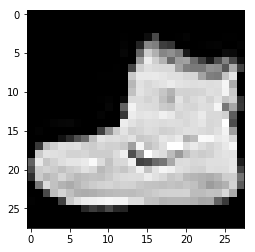

In [59]:
plt.imshow(image.squeeze(), cmap='gray')

print ("label:", label_dict[label.item()])

#### PyTorch DataLoader: Working with batches of data

We’ll start by creating a new data loader with a smaller batch size of 10 so it’s easy to demonstrate what’s going on:



In [60]:
display_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

We get a batch from the loader in the same way that we saw with the training set. We use the iter() and next() functions.

There is one thing to notice when working with the data loader. If shuffle=True, then the batch will be different each time a call to next occurs. With shuffle=True, the first samples in the training set will be returned on the first call to next. The shuffle functionality is turned off by default.

In [61]:
batch = next(iter(display_loader))
print (len(batch))

2


In [65]:
print (batch[0].shape) # (batch size, number of color channels, image height, image width)

print (batch[1].shape)

images, labels = batch

torch.Size([10, 1, 28, 28])
torch.Size([10])


To plot a batch of images, we can use the torchvision.utils.make_grid() function to create a grid that can be plotted like so:



In [68]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

Ankle boot T-shirt/top T-shirt/top Dress T-shirt/top Pullover Sneaker Pullover Sandal Sandal 

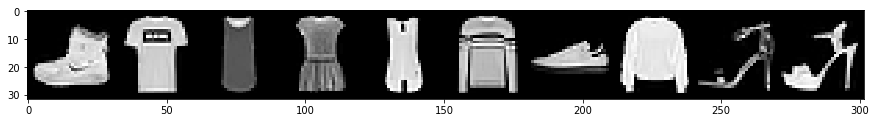

In [73]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))

plt.imshow(np.transpose(grid, (1,2,0)))

for label in labels:
    print (label_dict[label.item()], end=" ")